In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp


In [2]:
# All the Tone in Noise blocks 
TIN_data_1 = sp.io.loadmat('../TIN_CP_data/1-46_CP_data.mat')
TIN_data_2 = sp.io.loadmat('../TIN_CP_data/51-100_CP_data.mat')
TIN_data_3 = sp.io.loadmat('../TIN_CP_data/101-166_CP_data.mat')
TIN_data_4 = sp.io.loadmat('../TIN_CP_data/168-178_CP_data.mat')

In [3]:
# All the Tone in Quiet blocks
TIQ_data_1 = sp.io.loadmat('../TIQ_CP_data/Alpha_Grand_CPs.mat')
TIQ_data_2 = sp.io.loadmat('../TIQ_CP_data/Bravo_Grand_CPs.mat')
TIQ_data_3 = sp.io.loadmat('../TIQ_CP_data/Charlie_Grand_CPs.mat')
TIQ_data_4 = sp.io.loadmat('../TIQ_CP_data/Delta_Grand_CPs.mat')

In [7]:
TIQ_data_2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Grand_CP'])

In [4]:
TIN_Grand_CP_1 = TIN_data_1.get('Grand_CP')
TIN_Grand_CP_2 = TIN_data_2.get('Grand_CP')
TIN_Grand_CP_3 = TIN_data_3.get('Grand_CP')
TIN_Grand_CP_4 = TIN_data_4.get('Grand_CP')

In [5]:
TIQ_Grand_CP_1 = TIQ_data_1.get('Grand_CP')
TIQ_Grand_CP_2 = TIQ_data_2.get('Grand_CP')
TIQ_Grand_CP_3 = TIQ_data_3.get('Grand_CP')
TIQ_Grand_CP_4 = TIQ_data_4.get('Grand_CP')

In [13]:
# Initial Split and concat grand cp values into seperate IC and CN df's
# TIN Data
# column 16 (index 15) is the 200 ms condition 
# Group 1 -- 1- 46 is all IC ,  
# Group 2 --  51 - 100 is all IC , 
# Group 3 --  101-166 is first 2 IC and the rest CN,
# Group 4 --  168-178 is all CN
TIN_IC_Grand_CP = np.concatenate((TIN_Grand_CP_1,
                                  TIN_Grand_CP_2,
                                  TIN_Grand_CP_3[:2,:]), axis=0)

TIN_CN_Grand_CP = np.concatenate((TIN_Grand_CP_3[2:,:],
                                  TIN_Grand_CP_4), axis=0)

In [14]:
# TIQ Data
# Alpha -- 1-35 IC , 36-46 CN
# Bravo -- 1-35 IC , 36-58 CN
# Charlie -- All IC
# Delta -- 1-20 IC , 21-31 CN

TIQ_IC_Grand_CP = np.concatenate((TIQ_Grand_CP_1[:35,:],
                                  TIQ_Grand_CP_2[:35,:],
                                  TIQ_Grand_CP_3,
                                  TIQ_Grand_CP_4[:20,:]), axis = 0)

TIQ_CN_Grand_CP = np.concatenate((TIQ_Grand_CP_1[35:,:],
                                  TIQ_Grand_CP_2[35:,:],
                                  TIQ_Grand_CP_4[20:,:]), axis = 0)

In [15]:
# ---- TIN Data 
# IC 
TIN_IC_value_list = []
for col in range(0, len(TIN_IC_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(TIN_IC_Grand_CP[:,col])):
        if (type(TIN_IC_Grand_CP[:,col][row][0]) == np.ndarray) & (len(TIN_IC_Grand_CP[:,col][row][0]) > 0):
            value = TIN_IC_Grand_CP[:,col][row][0,0]   
        else:
            value = TIN_IC_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    TIN_IC_value_list.insert(col, col_list)

# CN
TIN_CN_value_list = []
for col in range(0, len(TIN_CN_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(TIN_CN_Grand_CP[:,col])):
        if (type(TIN_CN_Grand_CP[:,col][row][0]) == np.ndarray) & (len(TIN_CN_Grand_CP[:,col][row][0]) > 0):
            value = TIN_CN_Grand_CP[:,col][row][0,0]   
        else:
            value = TIN_CN_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    TIN_CN_value_list.insert(col, col_list)    

In [16]:
# ---- TIQ Data 
# IC 
TIQ_IC_value_list = []
for col in range(0, len(TIQ_IC_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(TIQ_IC_Grand_CP[:,col])):
        if (type(TIQ_IC_Grand_CP[:,col][row][0]) == np.ndarray) & (len(TIQ_IC_Grand_CP[:,col][row][0]) > 0):
            value = TIQ_IC_Grand_CP[:,col][row][0,0]   
        else:
            value = TIQ_IC_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    TIQ_IC_value_list.insert(col, col_list)

# CN
TIQ_CN_value_list = []
for col in range(0, len(TIQ_CN_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(TIQ_CN_Grand_CP[:,col])):
        if (type(TIQ_CN_Grand_CP[:,col][row][0]) == np.ndarray) & (len(TIQ_CN_Grand_CP[:,col][row][0]) > 0):
            value = TIQ_CN_Grand_CP[:,col][row][0,0]   
        else:
            value = TIQ_CN_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    TIQ_CN_value_list.insert(col, col_list)    

In [17]:
TIN_IC_df = pd.DataFrame(TIN_IC_value_list).replace(to_replace='NA', value=np.nan)
TIN_CN_df = pd.DataFrame(TIN_CN_value_list).replace(to_replace='NA', value=np.nan)

TIQ_IC_df = pd.DataFrame(TIQ_IC_value_list).replace(to_replace='NA', value=np.nan)
TIQ_CN_df = pd.DataFrame(TIQ_CN_value_list).replace(to_replace='NA', value=np.nan)

c:\Users\jacks\anaconda3\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


Now we have 4 DFs that correspond to :
1. Tone in Noise IC
2. Tone in Noise CN
3. Tone in Quiet IC
4. Tone in Quiet CN

These all have columns corresponding to Neural Units and rows corresponding to the increasing tone durations that unit was tested at. From  12.5 to 200 ms

WE have to average over each time duration(row) and match up the corresponding Noise and Quiet DP for that duration.  

In [44]:
IC_graph_data = pd.DataFrame(data = {'noise': TIN_IC_df.iloc[15,:], 
                                     'quiet': TIQ_IC_df.iloc[15,:]} ).dropna().reset_index()

CN_graph_data = pd.DataFrame(data = {'noise': TIN_CN_df.iloc[15,:], 
                                     'quiet': TIQ_CN_df.iloc[15,:]} ).dropna().reset_index()

In [61]:
TIQ_IC_df.mean(axis=1)

0     0.471619
1     0.466469
2     0.480859
3     0.475172
4     0.484008
5     0.482603
6     0.479583
7     0.480795
8     0.484087
9     0.478796
10    0.484912
11    0.486538
12    0.483766
13    0.485989
14    0.489531
15    0.484174
dtype: float64

TypeError: unhashable type: 'numpy.ndarray'

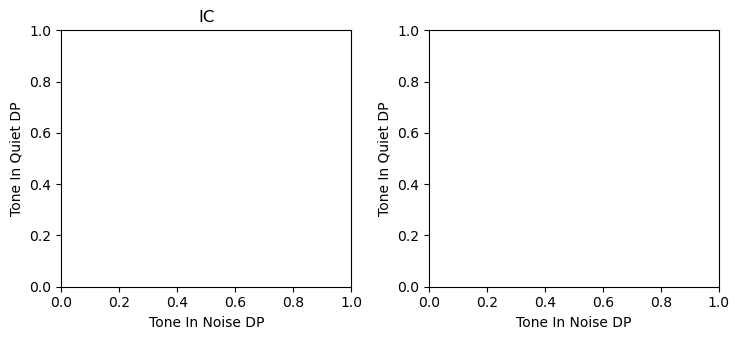

In [45]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
# axes[0].set_xlim([0,200])
# axes[0].set_ylim([0,1])
axes[0].set_xlabel('Tone In Noise DP')
axes[0].set_ylabel('Tone In Quiet DP')
# axes[1].set_xlim([0,200])
# axes[1].set_ylim([0,1])
axes[1].set_xlabel('Tone In Noise DP')
axes[1].set_ylabel('Tone In Quiet DP')

# IC Lines
axes[0].set_title('IC')
sns.scatterplot(ax = axes[0],
                data = IC_graph_data,
                x = 'noise',
                y = 'quiet'
            )

# CN Histogram
axes[1].set_title('CN')
sns.scatterplot(ax = axes[1],
                data = CN_graph_data,
                x = 'noise',
                y = 'quiet'
            )

plt.show()  